In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train_df = pd.read_csv("../data/train.csv")
train_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0,0.0,7.0,0.6,188.0,2.0,...,20.0,756.0,2549.0,9.0,7.0,19,0,0,1,1
1,1021,1,0.5,1,0.0,1.0,53.0,0.7,136.0,3.0,...,905.0,1988.0,2631.0,17.0,3.0,7,1,1,0,2
2,563,1,0.5,1,2.0,1.0,41.0,0.9,145.0,5.0,...,1263.0,1716.0,2603.0,11.0,2.0,9,1,1,0,2
3,615,1,2.5,0,0.0,0.0,10.0,0.8,131.0,6.0,...,1216.0,1786.0,2769.0,16.0,8.0,11,1,0,0,2
4,1821,1,1.2,0,13.0,1.0,44.0,0.6,141.0,2.0,...,1208.0,1212.0,1411.0,8.0,2.0,15,1,1,0,1


In [24]:
train_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,1995.000000,1995.000000,1995.000000,1995.000000,1996.000000,1996.000000,...,1996.000000,1998.000000,1998.000000,1999.000000,1999.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.310276,0.521303,32.048120,0.502256,140.266533,4.518036,...,644.651804,1251.287788,2124.262262,12.303652,5.766383,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.335766,0.499671,18.146476,0.288530,35.384676,2.288946,...,443.355443,432.352930,1085.273372,4.212373,4.357400,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.000000,874.250000,1206.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2147.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3065.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [25]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               5
four_g           5
int_memory       5
m_dep            5
mobile_wt        4
n_cores          4
pc               5
px_height        4
px_width         2
ram              2
sc_h             1
sc_w             1
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [27]:
outliers = {}

for column in train_df.columns:
    Q1 = train_df[column].quantile(0.25)
    Q3 = train_df[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers[column] = train_df[column][(train_df[column] < (Q1 - 1.5 * IQR)) | (train_df[column] > (Q3 + 1.5 * IQR))]

for column, values in outliers.items():
    print(f"{column}: {values}")

battery_power: Series([], Name: battery_power, dtype: int64)
blue: Series([], Name: blue, dtype: int64)
clock_speed: Series([], Name: clock_speed, dtype: float64)
dual_sim: Series([], Name: dual_sim, dtype: int64)
fc: 95      18.0
169     17.0
226     18.0
229     17.0
300     17.0
305     18.0
372     17.0
584     17.0
1387    18.0
1406    18.0
1416    18.0
1549    17.0
1554    18.0
1693    18.0
1705    19.0
1880    18.0
1882    18.0
1888    18.0
Name: fc, dtype: float64
four_g: Series([], Name: four_g, dtype: float64)
int_memory: Series([], Name: int_memory, dtype: float64)
m_dep: Series([], Name: m_dep, dtype: float64)
mobile_wt: Series([], Name: mobile_wt, dtype: float64)
n_cores: Series([], Name: n_cores, dtype: float64)
pc: Series([], Name: pc, dtype: float64)
px_height: 988     1949.0
1771    1960.0
Name: px_height, dtype: float64
px_width: Series([], Name: px_width, dtype: float64)
ram: Series([], Name: ram, dtype: float64)
sc_h: Series([], Name: sc_h, dtype: float64)
sc_w: Ser

#### Visualizing Outliers Using Box Plot

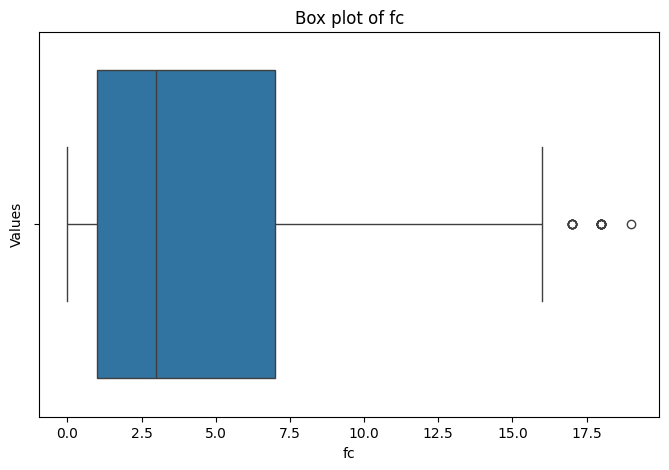

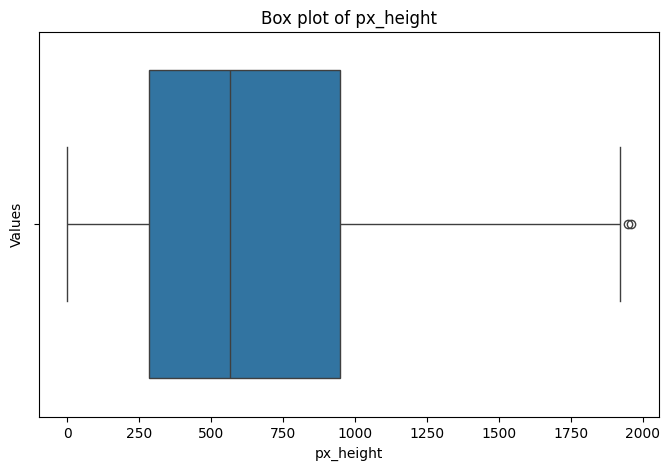

In [28]:
features = ['fc', 'px_height']

for feature in features:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=train_df, x=feature)
    plt.title(f"Box plot of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Values")
    plt.show()

#### Assumptions Regarding Data Treatment

Front Camera Megapixels (fc): Due to the expected range of front camera megapixels in modern smartphones, outliers were retained in the data. It is assumed that these high values are accurate representations and not errors.

Pixel Resolution Height (px_height): Minor outliers were identified in the pixel resolution height data. However, it is assumed these variations are genuine and were not excluded from the analysis.

#### Assumptions for Missing Values

To address the presence of outliers in the features 'fc' and 'px_height,' I will employ the median as the measure of central tendency. This approach is chosen because the median is less susceptible to the influence of extreme values compared to the mean.

For the categorical feature 'four_g,' I will utilize the mode to impute missing values. The mode represents the most frequent value within the category, and using this approach is appropriate for nominal categorical data.

In [29]:
train_df.loc[:, 'four_g'] = train_df['four_g'].fillna(train_df['four_g'].mode()[0])

train_df.fillna(train_df.median(), inplace=True)

In [30]:
train_df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

### Exploratory Data Analysis (EDA) 

In [32]:
# Explore categorical features using value counts
categorical_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']

for feature in categorical_features:
    print(f"Value counts for {feature}:")
    print(train_df[feature].value_counts())
    print()

Value counts for blue:
blue
0    1010
1     990
Name: count, dtype: int64

Value counts for dual_sim:
dual_sim
1    1019
0     981
Name: count, dtype: int64

Value counts for four_g:
four_g
1.0    1045
0.0     955
Name: count, dtype: int64

Value counts for three_g:
three_g
1    1523
0     477
Name: count, dtype: int64

Value counts for touch_screen:
touch_screen
1    1006
0     994
Name: count, dtype: int64

Value counts for wifi:
wifi
1    1014
0     986
Name: count, dtype: int64

Value counts for price_range:
price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64



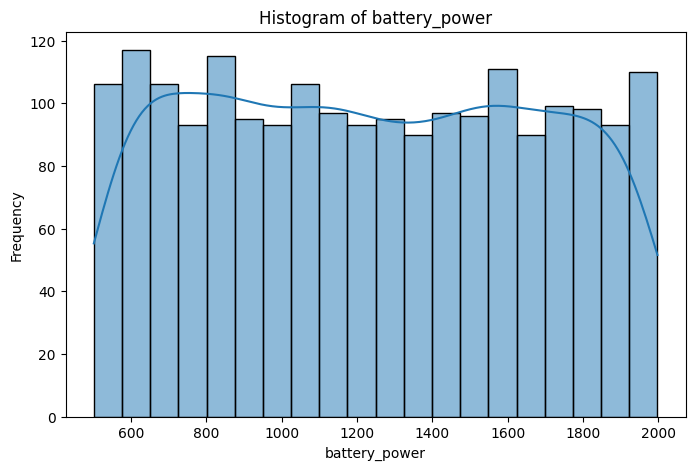

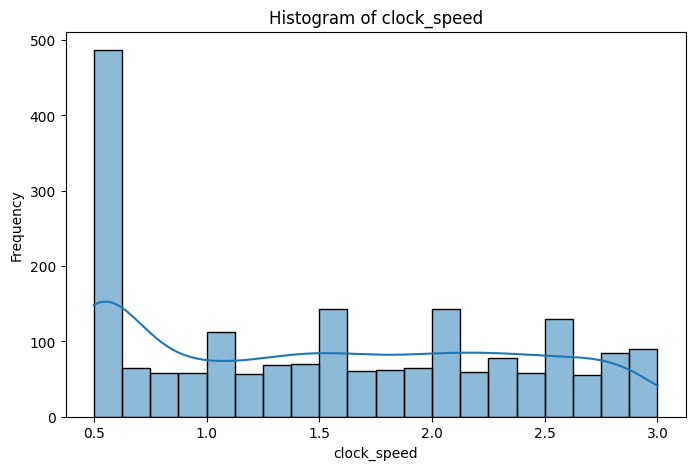

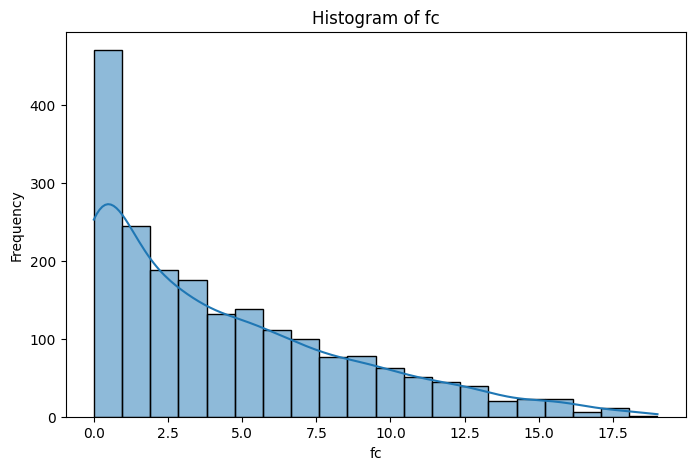

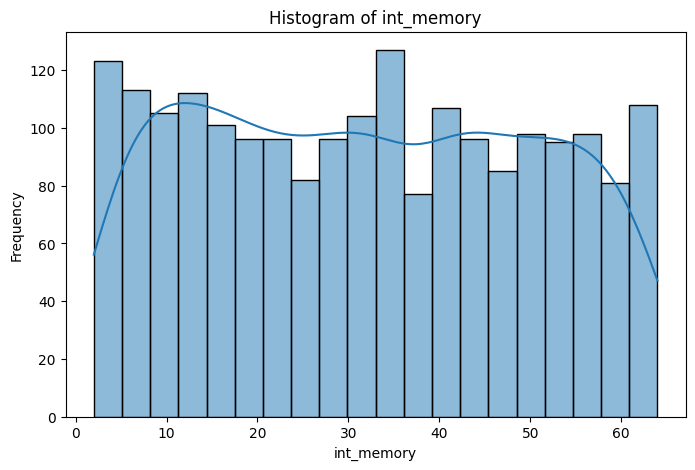

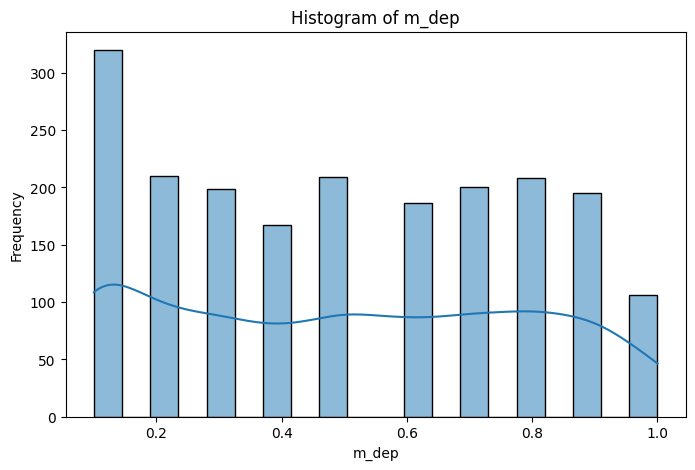

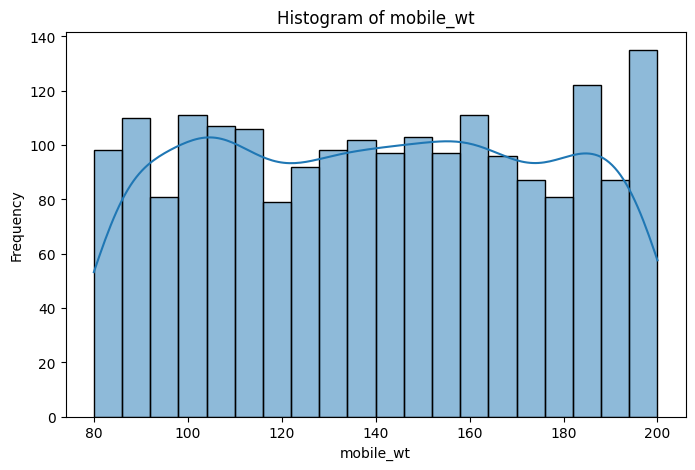

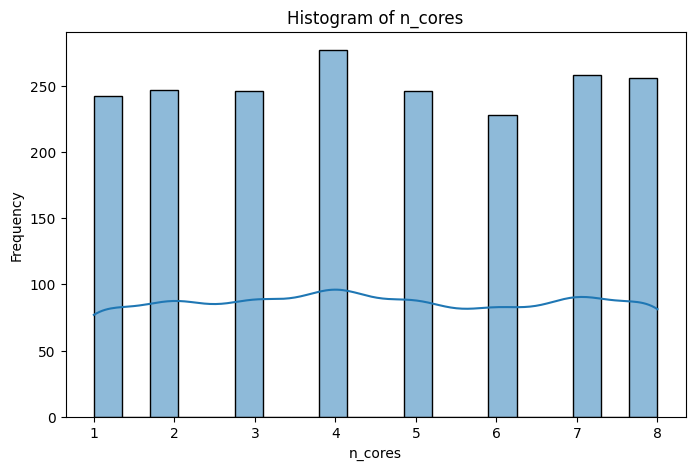

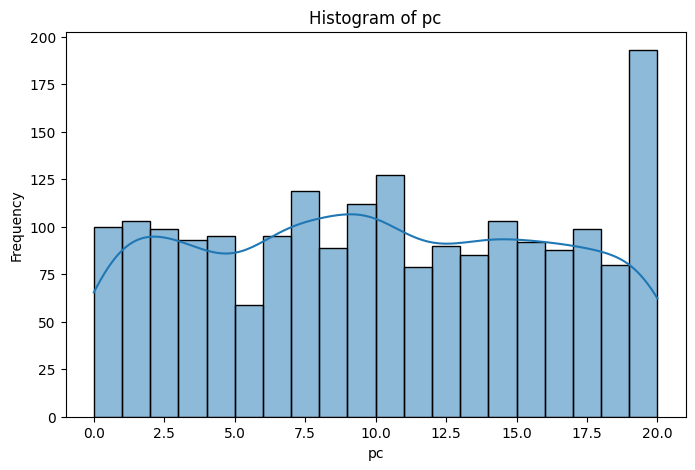

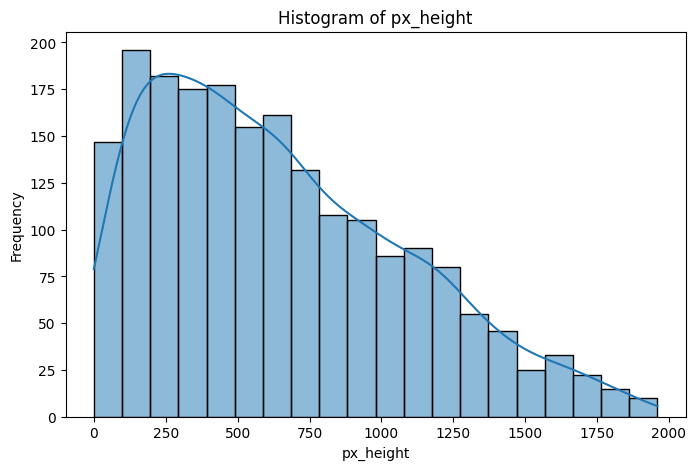

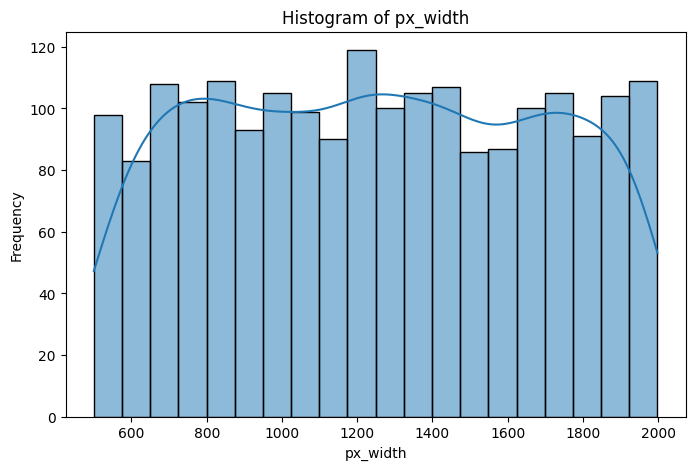

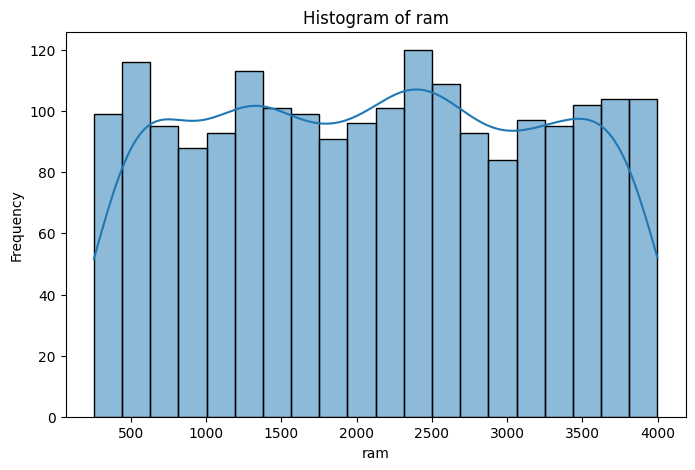

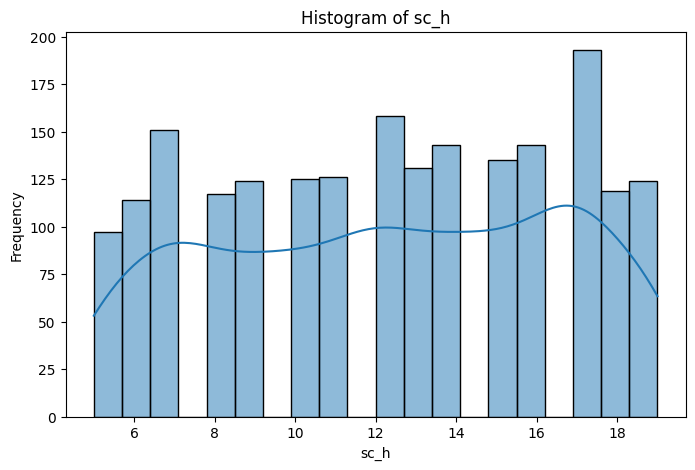

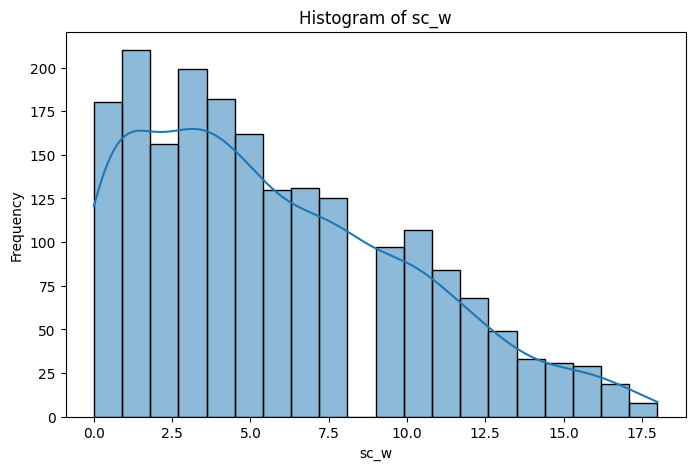

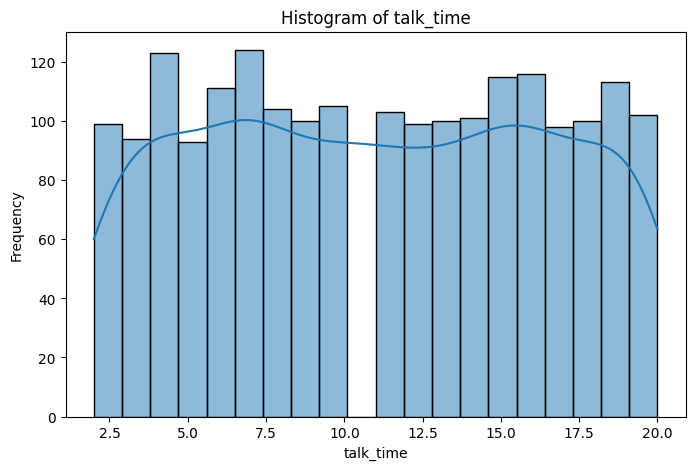

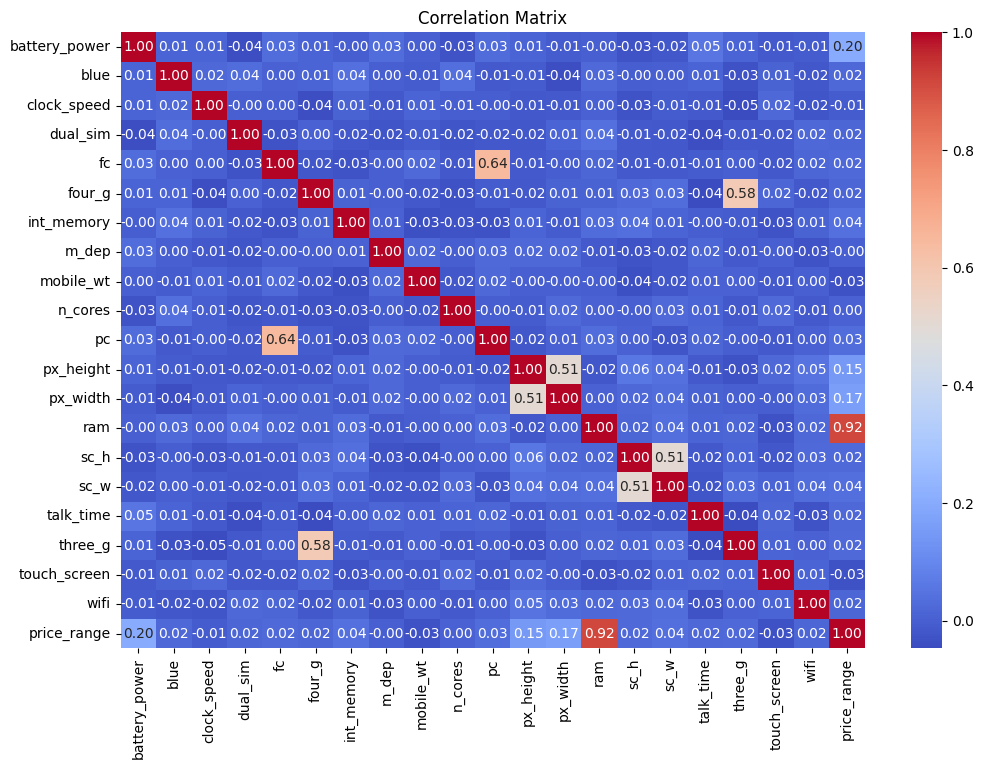

In [33]:
# Plot histograms for numerical features
numerical_features = ['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
                      'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_df, x=feature, bins=20, kde=True)
    plt.title(f"Histogram of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Saving cleaned and processed data to a new CSV file for further analysis and model training.

In [34]:
train_df.to_csv("../data/cleaned_train.csv", index=False)